In [1]:
import pandas as pd
from numpy import *
from math import *
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from scipy.integrate import odeint
from scipy.misc import derivative
import statsmodels.formula.api as smf
from datetime import datetime
import itertools  
from tslearn.metrics import soft_dtw
from tslearn.metrics import dtw




In [2]:
#agent base modeling to find parameters for a specific bass model
def dfsn_abm(p, q, M, T):
    adopt = list()
    x = zeros((M,), float32)
    x_temp = zeros((M,), float32)
    adoptions = pd.DataFrame(arange(1,T), columns = ['time'])
    for t in range(T):
        for i in range(1,M):
            prob = (p + q * (sum(x) / M)) * (1 - x[i])
            if random.uniform(0,1) <= prob:
                x_temp[i] = 1
        x = x_temp
        adopt.append(sum(x))
    return adopt

In [3]:
#bass pdf
def densityFunction(p, q, t):
    return (np.exp((p+q)*t)*p*(p+q)**2)/((p*np.exp((p+q)*t)+q)**2)

In [5]:
#possible values for Q and P
pl = list(range(1, 20))
pl = [v*0.01 for v in pl]

ql = list(range(1, 20))
ql = [v*0.1/2 for v in ql]

178


<AxesSubplot:>

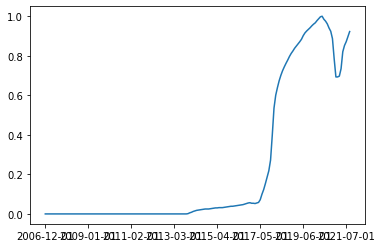

In [6]:
#Plot and smooth example tech
df = pd.read_csv('Lithium ion battery.csv',index_col=0)
print(len(df.columns.values))
df = df.iloc[2]
df=(df-df.min())/(df.max()-df.min())
df.plot()
#df.plot()
#

<AxesSubplot:>

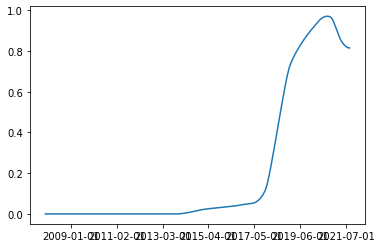

In [7]:
df = df.rolling(window=12).mean()
df.plot()

1000000


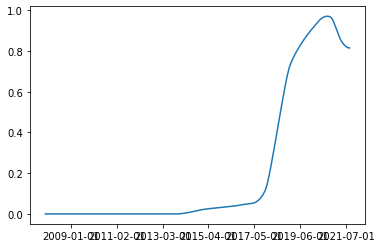

In [8]:
#run all possible values of Q and P and find the ideal
t = np.linspace(1, 32, 32)

lowest = 1000000
for p, q in list(itertools.product(pl, ql)):
    f = densityFunction(p,q,t)
    #raise A
    sim_df = pd.DataFrame(f)
    #dtw_score = soft_dtw(sim_df.values, df.values, gamma=.01)
    dtw_score = dtw(sim_df.values, df.values)
    if dtw_score<lowest:
        lowest=dtw_score
        df = sim_df
        best_p = p
        best_q = q
   

# print('p '+str(best_p)+', '+'q '+str(best_q))
print(lowest)
plt.figure()
df.plot()
plt.show()

In [9]:
#dtw similarity score, this code was originaly in the bass test 
dtw_score = soft_dtw(sim_df.dropna().values, df.dropna().values, gamma=.1)
dtw_score

19.546243172335842

In [10]:
sim_dfsn = [dfsn_abm(0.01, 0.3, 10000, 120) for _ in range(5)]
sim_dfsn = [list(pd.DataFrame(sim_dfsn).mean().values)]

<AxesSubplot:>

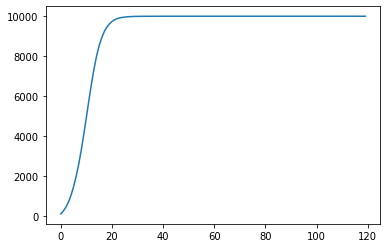

In [11]:
df = pd.DataFrame(array(sim_dfsn))
df = df.transpose()
df.plot(legend = None)

In [12]:
sim_dfsn = [dfsn_abm(0.01, 0.3, 1000, 60) for _ in range(60)]

<AxesSubplot:>

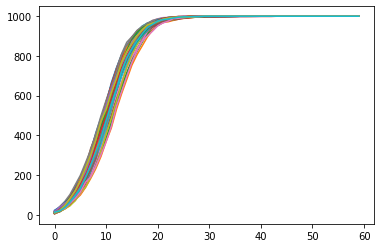

In [13]:
df = pd.DataFrame(array(sim_dfsn))
df = df.transpose()

df.plot(legend = None)

In [14]:
df['time'] = range(1,61)
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

In [15]:
a = df.columns[range(1,61)]
b = ['sim ' + str(i) for i in range(1,len(a)+1)]
d = dict(zip(a, b))
df = df.rename(columns = d)
df

,time,sim 1,sim 2,sim 3,sim 4,sim 5,sim 6,sim 7,sim 8,sim 9,...,sim 51,sim 52,sim 53,sim 54,sim 55,sim 56,sim 57,sim 58,sim 59,sim 60
0,1,7.0,11.0,8.0,9.0,9.0,14.0,6.0,11.0,11.0,...,8.0,13.0,10.0,11.0,17.0,7.0,10.0,7.0,10.0,13.0
1,2,21.0,31.0,22.0,29.0,16.0,35.0,18.0,32.0,24.0,...,28.0,28.0,24.0,31.0,38.0,18.0,22.0,26.0,20.0,19.0
2,3,45.0,58.0,37.0,45.0,34.0,60.0,38.0,57.0,47.0,...,53.0,43.0,43.0,50.0,55.0,35.0,33.0,48.0,47.0,36.0
3,4,71.0,86.0,51.0,73.0,58.0,92.0,69.0,92.0,90.0,...,78.0,71.0,67.0,78.0,82.0,55.0,58.0,70.0,82.0,63.0
4,5,103.0,134.0,80.0,104.0,85.0,142.0,96.0,130.0,125.0,...,105.0,103.0,110.0,108.0,121.0,83.0,82.0,102.0,120.0,96.0
5,6,155.0,176.0,120.0,146.0,132.0,189.0,160.0,178.0,172.0,...,136.0,143.0,154.0,153.0,168.0,115.0,114.0,141.0,171.0,132.0
6,7,201.0,248.0,159.0,195.0,188.0,240.0,215.0,243.0,228.0,...,187.0,180.0,213.0,208.0,217.0,172.0,163.0,192.0,234.0,186.0
7,8,258.0,320.0,217.0,267.0,241.0,333.0,274.0,316.0,275.0,...,239.0,239.0,277.0,269.0,287.0,225.0,190.0,240.0,300.0,250.0
8,9,319.0,393.0,279.0,345.0,296.0,401.0,336.0,388.0,347.0,...,324.0,325.0,354.0,347.0,378.0,290.0,244.0,299.0,377.0,316.0
9,10,402.0,479.0,362.0,436.0,385.0,480.0,408.0,463.0,412.0,...,400.0,392.0,445.0,427.0,467.0,392.0,302.0,376.0,471.0,387.0


<Figure size 1440x720 with 0 Axes>

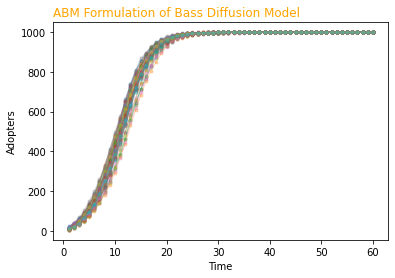

<Figure size 1440x720 with 0 Axes>

In [16]:
num=0
for column in df.drop('time', axis=1):
    num+=1
    plt.plot(df['time'], df[column], marker='.', linewidth=1, alpha=0.3, label=column)

plt.title("ABM Formulation of Bass Diffusion Model", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Adopters")
plt.figure(figsize=(20,10))

In [17]:
sim_dfsn2 = [dfsn_abm(0.005, 0.4, 1000, 25) for _ in range(25)]

<AxesSubplot:>

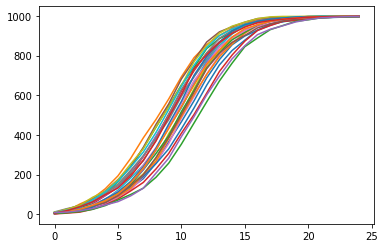

In [18]:
df = pd.DataFrame(array(sim_dfsn2))
df = df.transpose()

df.plot(legend = None)

In [19]:
df['time'] = range(1,26)
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

In [20]:
a = df.columns[range(1,26)]
b = ['sim ' + str(i) for i in range(1,len(a)+1)]
d = dict(zip(a, b))
df = df.rename(columns = d)

<Figure size 1440x720 with 0 Axes>

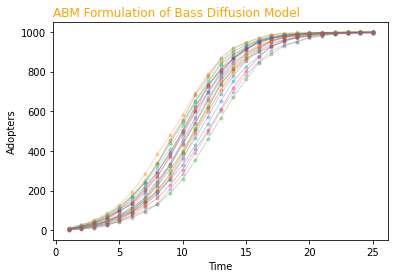

<Figure size 1440x720 with 0 Axes>

In [21]:
num=0
for column in df.drop('time', axis=1):
    num+=1
    plt.plot(df['time'], df[column], marker='.', linewidth=1, alpha=0.3, label=column)

plt.title("ABM Formulation of Bass Diffusion Model", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Adopters")
plt.figure(figsize=(20,10))

In [22]:
sim_dfsn3 = [dfsn_abm(0.05, 0.3, 1000, 25) for _ in range(25)]

<AxesSubplot:>

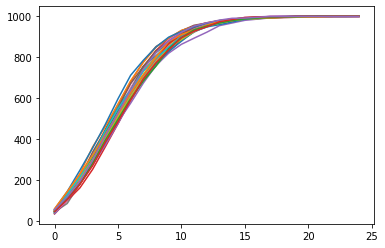

In [23]:
df = pd.DataFrame(array(sim_dfsn3))
df = df.transpose()

df.plot(legend = None)